<a href="https://colab.research.google.com/github/Dabii19/CFE-IA-E3/blob/main/RegresionLinealMultipleDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')

df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df = df.rename(columns={
    'Pregnancies': 'embarazos',
    'Glucose': 'glucosa',
    'BloodPressure': 'presion',
    'SkinThickness': 'piel',
    'Insulin': 'insulina',
    'BMI': 'imc',
    'DiabetesPedigreeFunction': 'herencia',
    'Age': 'edad',
    'Outcome': 'resultado'
})
df.head(5)


,embarazos,glucosa,presion,piel,insulina,imc,herencia,edad,resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


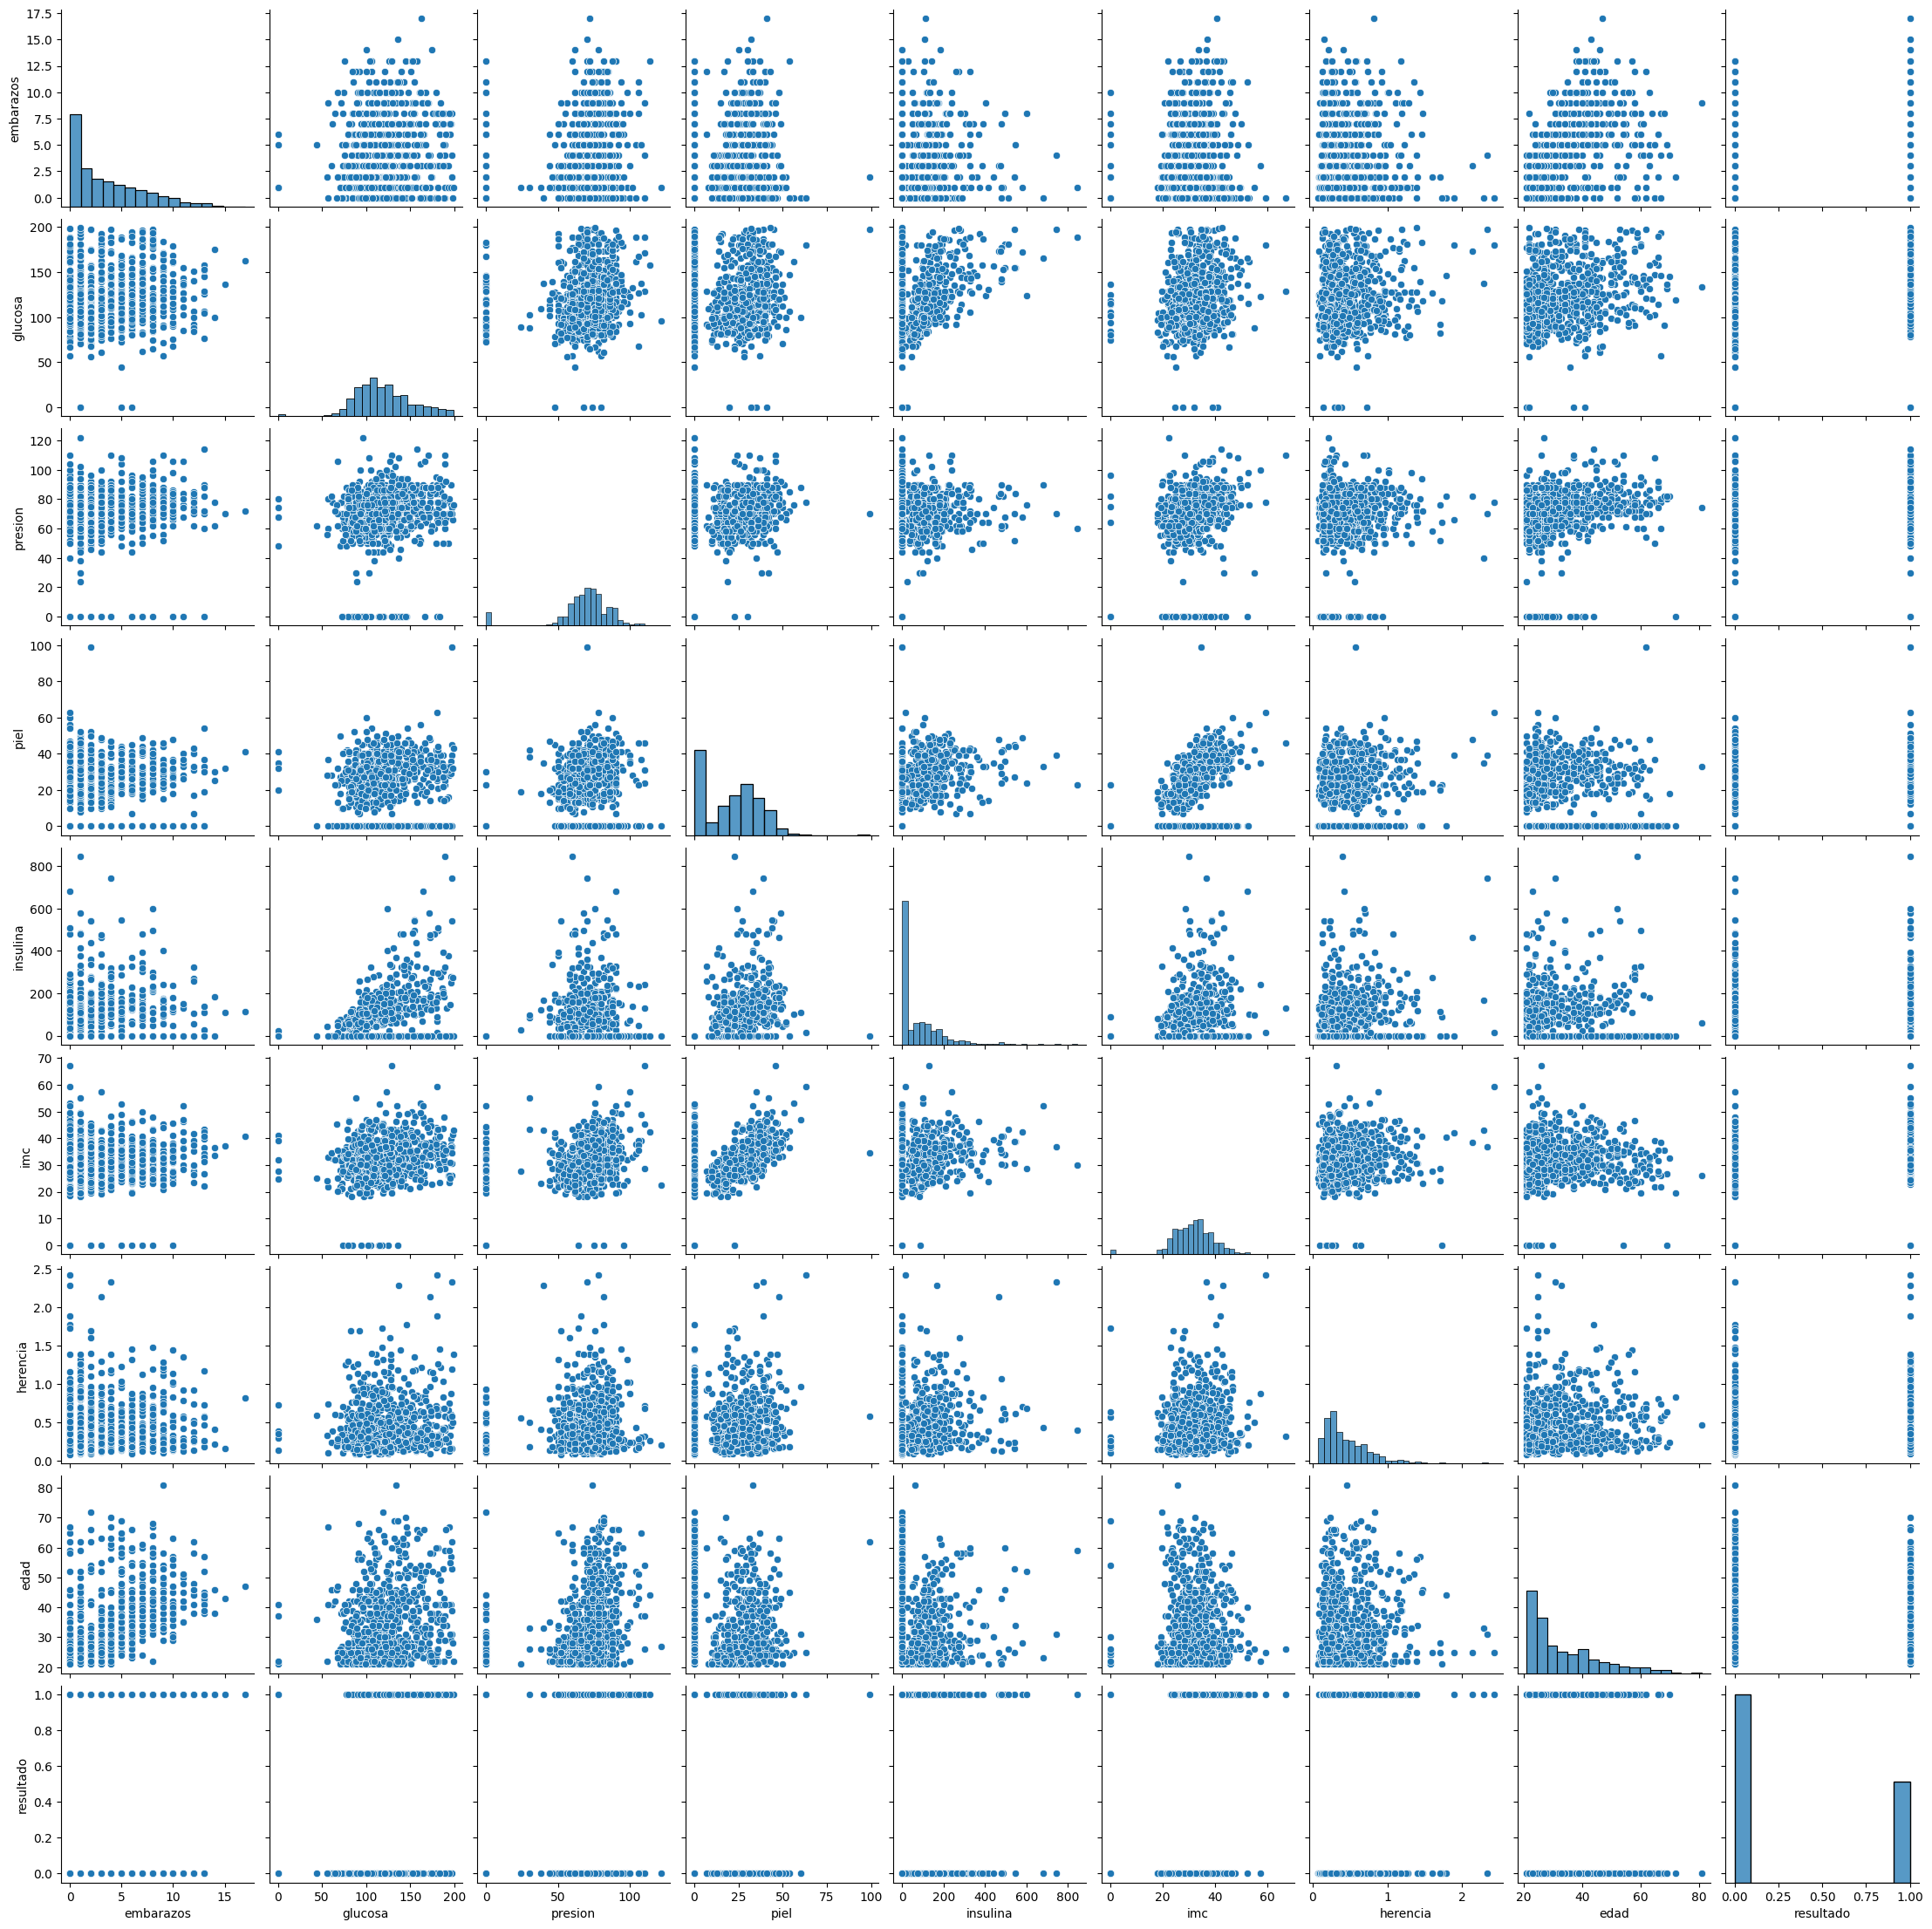

In [ ]:
# Librerías para crear y mostrar las gráficas
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas del dataset clínico (versión en español)
cols = ['embarazos', 'glucosa', 'presion', 'piel', 'insulina',
        'imc', 'herencia', 'edad', 'resultado']

# Crear pairplot para explorar relaciones
sns.pairplot(df[cols])
plt.show()

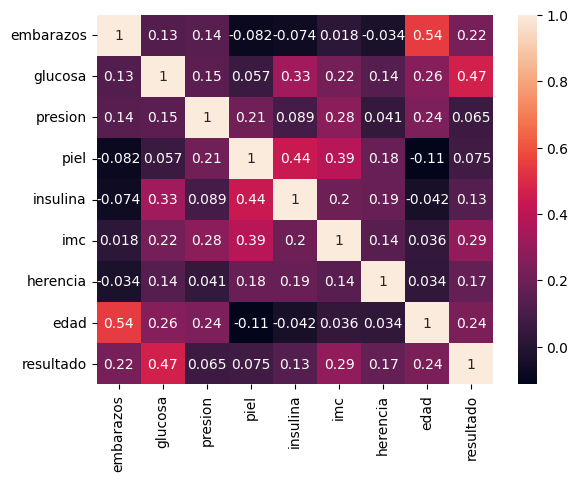

In [ ]:
sns.heatmap(df[cols].corr(), annot = True)
plt.show()

In [ ]:
# Entrenamiento

# Independiente edad y tiempo - Dependiente Muerte x_x

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Variables independientes
X = df[['imc', 'glucosa', 'edad']].values

# Variables dependientes
Y = df['resultado'].values.reshape(-1,1)

# Funcion para estandarizar
sx = StandardScaler()
sy = StandardScaler()

# Ajusta valores
X_s = sx.fit_transform(X)
Y_s = sy.fit_transform(Y)

lr = LinearRegression()
lr.fit(X_s, Y_s)

LinearRegression()

In [ ]:
import numpy as np

edad = 60
imc = 32.0
glucosa = 140

# Entrada estandarizada
input_s = sx.transform(np.array([[imc, glucosa, edad]]))
# Salida estandarizada
output_s = lr.predict(input_s)
# Salida des-estandarizada
output = sy.inverse_transform(output_s)

print("Probabilidad de tener diabetes: ", round(output[0][0] * 100, 2), '%')

Probabilidad de tener diabetes:  59.94 %
